# Analysis of Covariance


* Some predictors are qualitative in nature and described as **categorical** or called **factors**
* Analysis of covariance (ANCOVA) refers to regression problems where there is a mixture of quantitative and qualitative predictors

Suppose we are interested in the effect of a medication on cholesterol level. ANCOVA adjusts the groups for the age difference and then presents the effect of the medication

* The strategy is to incorporate qualitative predictors within the $y=X\beta+\epsilon$ framework
* Let's include the quantitative predictor by creating a dummy variable 


\begin{split}
d=
\begin{cases}
 0 \: \text{     did not take medication} \\      
 1 \: \text{     took medication}
\end{cases}
\end{split}

A variety of linear models may be considered here:
* 1) A single regression for both groups $y=\beta_0+ \beta_1x+\epsilon$
     - $y \sim x$
* 2) Separete regression lines for each group with the same slope $y=\beta_0+ \beta_1x+  \beta_2d+\epsilon$
     - $y \sim x + d$
     - $\beta_2$ represent the distance between the two lines
* 3) Separate regression lines for each group with the different slopes $y=\beta_0 + \beta_1 +  \beta_2d+ \beta_3xd +  \epsilon$
     - $y ~ x + d$ or $y ~ x*d$
     - Intepretation is  much easier if we can eliminate the slope  interaction term
     
We can also code $d$ as 

\begin{split}
d=
\begin{cases}
 -1 \: \text{     did not take medication} \\      
 1 \: \text{     took medication}
\end{cases}
\end{split}

## A Two-Level Example

Effect of childhood sexual abuse on adult females. 
* n=45 (cases) + n=31 (control)
* Response (factor): childhood sexual abuse (csa)
* post-traumatic stress disorder(ptsd)
*  Childhood physical abuse (cpa)


In [1]:
library(faraway)

In [2]:
data(sexab)
head(sexab)

,cpa,ptsd,csa
,<dbl>,<dbl>,<fct>
1,2.04786,9.71365,Abused
2,0.83895,6.16933,Abused
3,-0.24139,15.15926,Abused
4,-1.11461,11.31277,Abused
5,2.01468,9.95384,Abused
6,6.71131,9.83884,Abused


In [3]:
by(sexab, sexab$csa, summary)

sexab$csa: Abused
      cpa              ptsd               csa    
 Min.   :-1.115   Min.   : 5.985   Abused   :45  
 1st Qu.: 1.415   1st Qu.: 9.374   NotAbused: 0  
 Median : 2.627   Median :11.313                 
 Mean   : 3.075   Mean   :11.941                 
 3rd Qu.: 4.317   3rd Qu.:14.901                 
 Max.   : 8.647   Max.   :18.993                 
------------------------------------------------------------ 
sexab$csa: NotAbused
      cpa               ptsd               csa    
 Min.   :-3.1204   Min.   :-3.349   Abused   : 0  
 1st Qu.:-0.2299   1st Qu.: 3.544   NotAbused:31  
 Median : 1.3216   Median : 5.794                 
 Mean   : 1.3088   Mean   : 4.696                 
 3rd Qu.: 2.8309   3rd Qu.: 6.838                 
 Max.   : 5.0497   Max.   :10.914                 

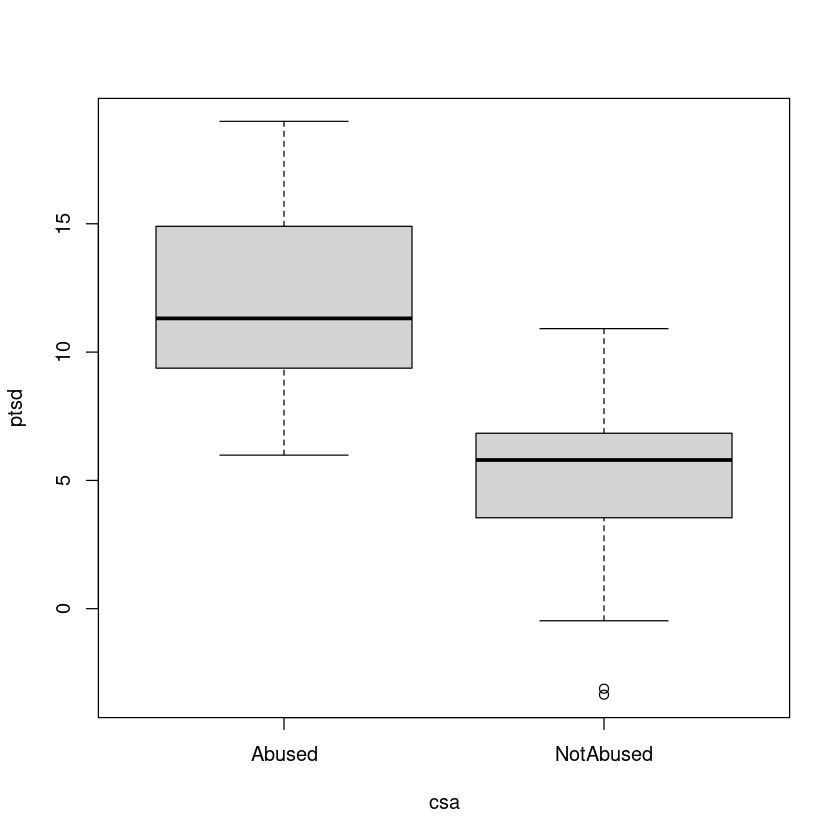

In [4]:
plot(ptsd ~csa, sexab)

* The abused group have higher levels of PTSD than those in the nonabused group

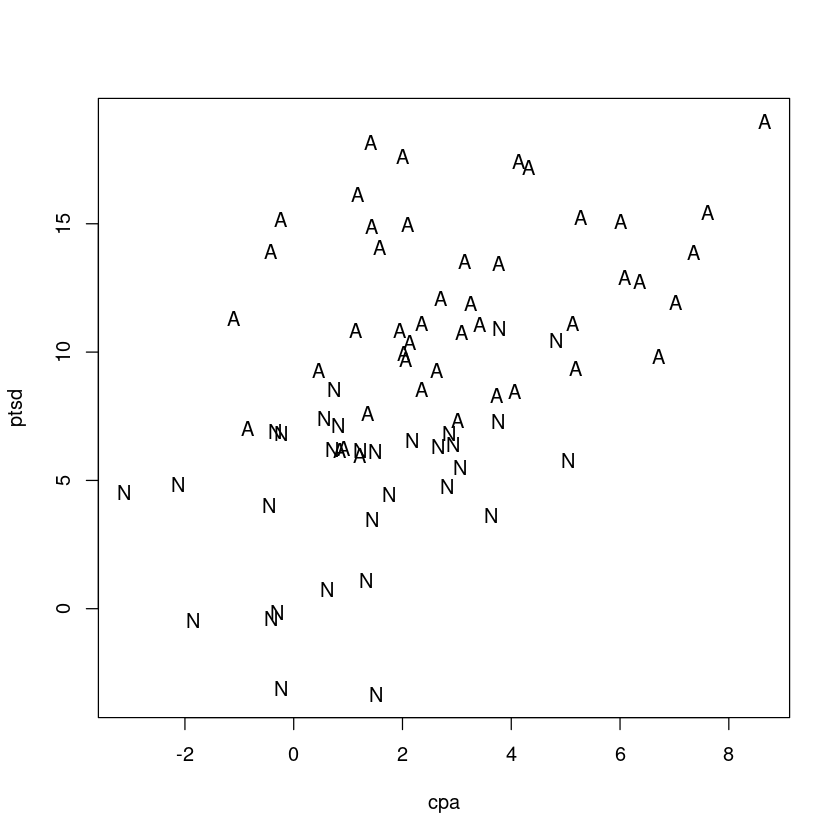

In [5]:
plot(ptsd ~cpa, pch=as.character(csa), sexab)

* Positive correlation between to predictors (PTSD and cpa). This might suggest physical abuse as an alternative explanation of higher PTSD in sexually abused group

In [6]:
t.test(sexab$ptsd[1:45], sexab$ptsd[46:76])


	Welch Two Sample t-test

data:  sexab$ptsd[1:45] and sexab$ptsd[46:76]
t = 8.9006, df = 63.675, p-value = 8.803e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.618873 8.871565
sample estimates:
mean of x mean of y 
11.941093  4.695874 


In [8]:
# Let's use the ANCOVA to disentangle the two competing explanation
g = lm(ptsd ~ cpa + csa + cpa:csa, sexab)
summary(g)


Call:
lm(formula = ptsd ~ cpa + csa + cpa:csa, data = sexab)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1999 -2.5313 -0.1807  2.7744  6.9748 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       10.5571     0.8063  13.094  < 2e-16 ***
cpa                0.4500     0.2085   2.159   0.0342 *  
csaNotAbused      -6.8612     1.0747  -6.384 1.48e-08 ***
cpa:csaNotAbused   0.3140     0.3685   0.852   0.3970    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.279 on 72 degrees of freedom
Multiple R-squared:  0.5828,	Adjusted R-squared:  0.5654 
F-statistic: 33.53 on 3 and 72 DF,  p-value: 1.133e-13


In [11]:
head(model.matrix(g))
tail(model.matrix(g))

,(Intercept),cpa,csaNotAbused,cpa:csaNotAbused
1,1,2.04786,0,0
2,1,0.83895,0,0
3,1,-0.24139,0,0
4,1,-1.11461,0,0
5,1,2.01468,0,0
6,1,6.71131,0,0


,(Intercept),cpa,csaNotAbused,cpa:csaNotAbused
71,1,-0.31402,1,-0.31402
72,1,2.17626,1,2.17626
73,1,-0.23208,1,-0.23208
74,1,-1.85753,1,-1.85753
75,1,2.85253,1,2.85253
76,1,0.81138,1,0.81138


In [12]:
# We can siplify the model given that the interaction was not significant
g = lm(ptsd ~ cpa + csa, sexab)
summary(g)


Call:
lm(formula = ptsd ~ cpa + csa, data = sexab)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1567 -2.3643 -0.1533  2.1466  7.1417 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   10.2480     0.7187  14.260  < 2e-16 ***
cpa            0.5506     0.1716   3.209  0.00198 ** 
csaNotAbused  -6.2728     0.8219  -7.632 6.91e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.273 on 73 degrees of freedom
Multiple R-squared:  0.5786,	Adjusted R-squared:  0.5671 
F-statistic: 50.12 on 2 and 73 DF,  p-value: 2.002e-14


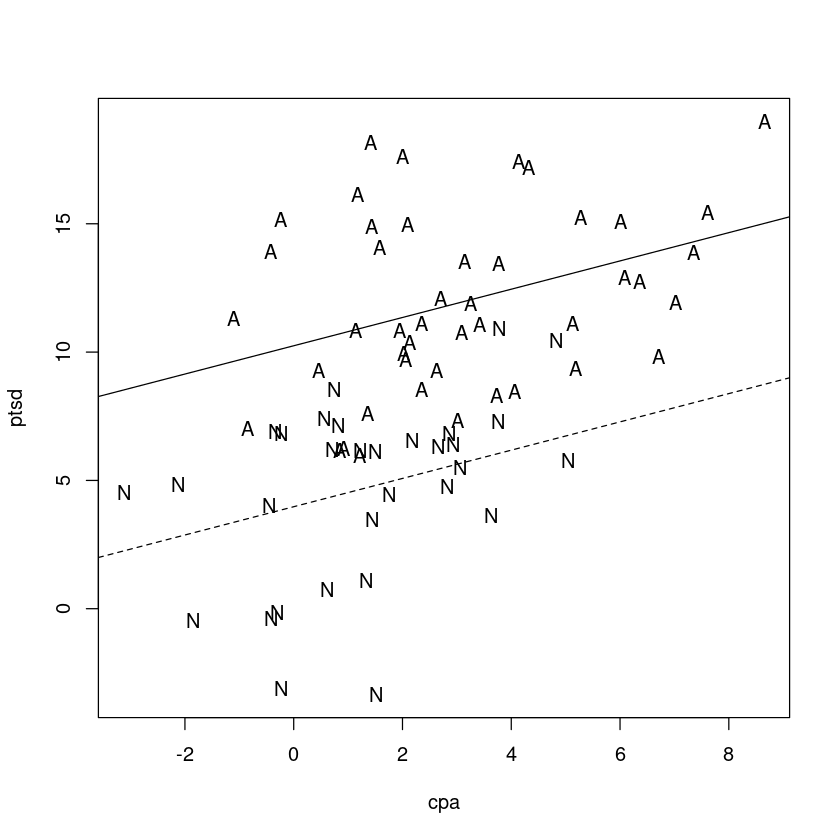

In [13]:
plot(ptsd ~ cpa, pch = as.character(csa), sexab)
abline(10.248, 0.551)
abline(10.248-6.273, 0.551, lty=2)

*  The slope of both lines is 0.551 but the "abused" line is 6.273 higher than the "nonAbused"

In [16]:
round(confint(g)[3,], 3)

2.5 % 97.5 % 
-7.911 -4.635

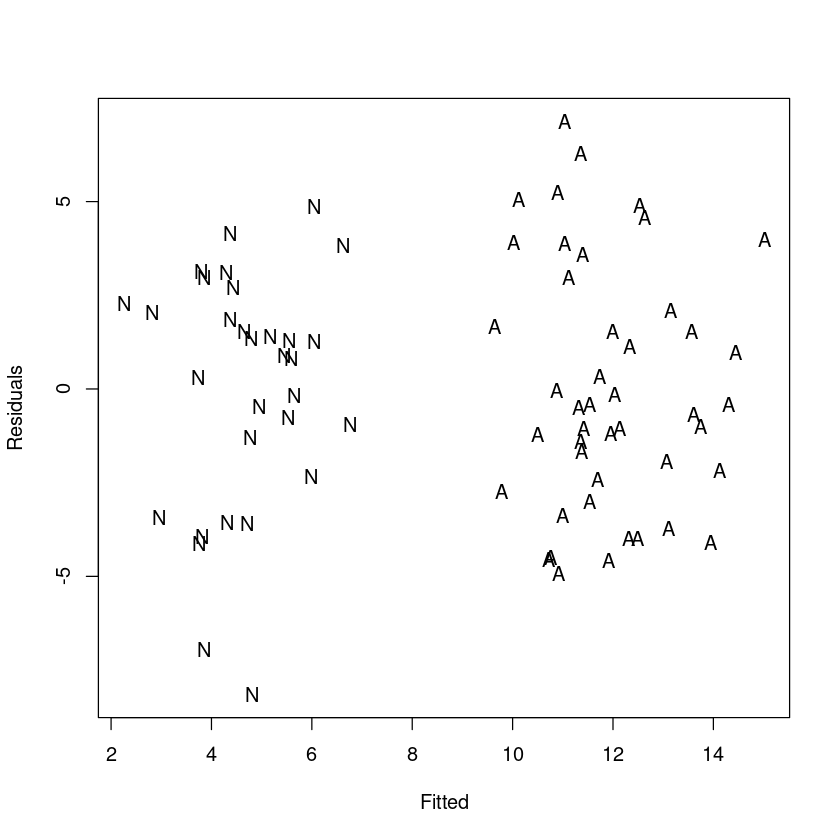

In [17]:
# Diagnostics check
plot(fitted(g), residuals(g), pch=as.character(sexab$csa), xlab="Fitted", ylab="Residuals")

In [18]:
# Change the reference level labels for convenience
sexab$csa = relevel(sexab$csa, ref="NotAbused")
g = lm(ptsd ~ cpa + csa, sexab)
summary(g)


Call:
lm(formula = ptsd ~ cpa + csa, data = sexab)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1567 -2.3643 -0.1533  2.1466  7.1417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9753     0.6293   6.317 1.87e-08 ***
cpa           0.5506     0.1716   3.209  0.00198 ** 
csaAbused     6.2728     0.8219   7.632 6.91e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.273 on 73 degrees of freedom
Multiple R-squared:  0.5786,	Adjusted R-squared:  0.5671 
F-statistic: 50.12 on 2 and 73 DF,  p-value: 2.002e-14


## Coding Qualitative Predictors

A more extensive use of dummy variables is needed for factor with more than two levels

### Treatment coding

Consider the four-level factor that will be coded using three dummy variable

In [20]:
contr.treatment(4)

,2,3,4
1,0,0,0
2,1,0,0
3,0,1,0
4,0,0,1


* The first row is coded as the group to which all other variables are compared. An equivalent of a control group

In [21]:
contr.helmert(4)

1,-1,-1,-1
2,1,-1,-1
3,0,2,-1
4,0,0,3


* If there are equal number of observation in each level (balanced design) then the dummy variable will be orthogonal to each other and to the intercept
*  The choice of code does not affect $R^2$, $\hat \sigma^2$ and $F-statistic$. It does affect $\hat \beta$

## A Multilevel Factor Example

Study about sexual activity and the life span of male fruitflies
* n=125 frutflies divided in 5 groups (randomly)
* Response = longevity
* Treatments = solitary, +1 virgin (low), +8 virgins (high), +1 pregnant female (one), +8 pregnant females (many)
* Thorax length was measured as covariable

In [2]:
data(fruitfly)
head(fruitfly)

,thorax,longevity,activity
,<dbl>,<int>,<fct>
1,0.68,37,many
2,0.68,49,many
3,0.72,46,many
4,0.72,63,many
5,0.76,39,many
6,0.76,46,many


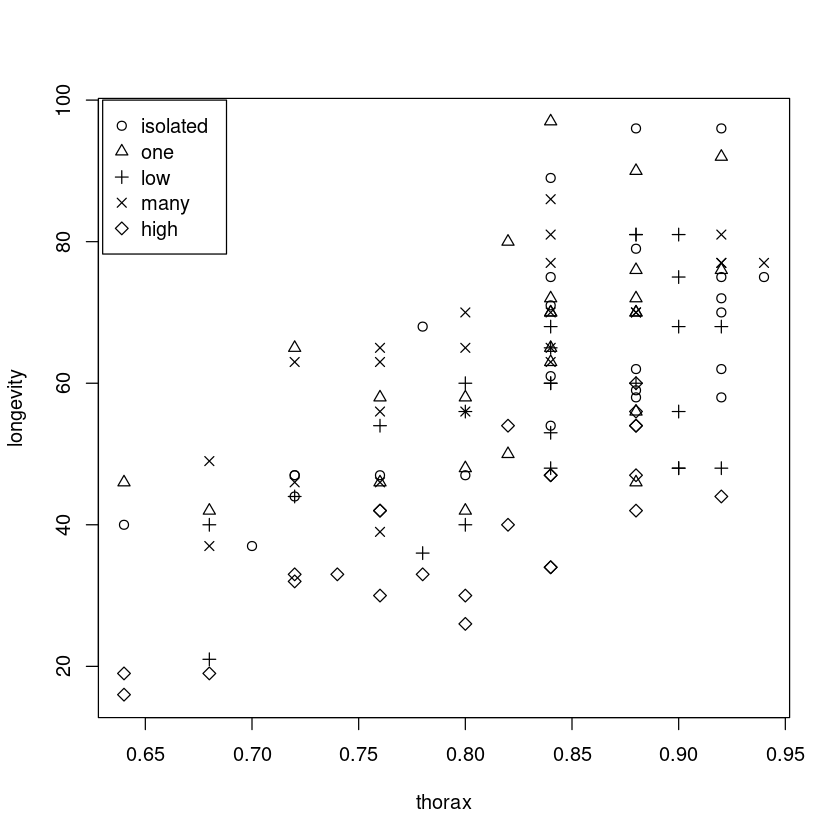

In [3]:
plot(longevity ~ thorax, fruitfly, pch=unclass(activity))
legend(0.63, 100, levels(fruitfly$activity), pch=1:5)

* Solitary males seems to have higher longevity while high sexual activity group seems to have lower longevity

In [8]:
#fruitfly$activity <- relevel(fruitfly$activity, ref = "many")
g = lm(longevity ~ thorax * activity, fruitfly)

summary(g)


Call:
lm(formula = longevity ~ thorax * activity, data = fruitfly)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.9509  -6.7296  -0.9103   6.1854  30.3071 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -50.2420    21.8012  -2.305    0.023 *  
thorax              136.1268    25.9517   5.245 7.27e-07 ***
activityone           6.5172    33.8708   0.192    0.848    
activitylow          -7.7501    33.9690  -0.228    0.820    
activitymany         -1.1394    32.5298  -0.035    0.972    
activityhigh        -11.0380    31.2866  -0.353    0.725    
thorax:activityone   -4.6771    40.6518  -0.115    0.909    
thorax:activitylow    0.8743    40.4253   0.022    0.983    
thorax:activitymany   6.5478    39.3600   0.166    0.868    
thorax:activityhigh -11.1268    38.1200  -0.292    0.771    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.71 on 114 degrees of freedom
Multiple R-square

* Isolated is the reference level and 

**Reference: Isolated** 
$ longevity = -50.2 + 136.1*(thorax)$

**For One**:
$ longevity = (-50.2 + 6.51) + 136.1*(thorax)$

**For many**:
$ longevity = (-50.2 - 1.14) + 136.1*(thorax)$

**For low**:
$ longevity = (-50.2 - 7.75) + 136.1*(thorax)$

**For high**:
$ longevity = (-50.2 - 11.04) + 136.1*(thorax)$


In [5]:
head(model.matrix(g))

,(Intercept),thorax,activityone,activitylow,activitymany,activityhigh,thorax:activityone,thorax:activitylow,thorax:activitymany,thorax:activityhigh
1,1,0.68,0,0,1,0,0,0,0.68,0
2,1,0.68,0,0,1,0,0,0,0.68,0
3,1,0.72,0,0,1,0,0,0,0.72,0
4,1,0.72,0,0,1,0,0,0,0.72,0
5,1,0.76,0,0,1,0,0,0,0.76,0
6,1,0.76,0,0,1,0,0,0,0.76,0


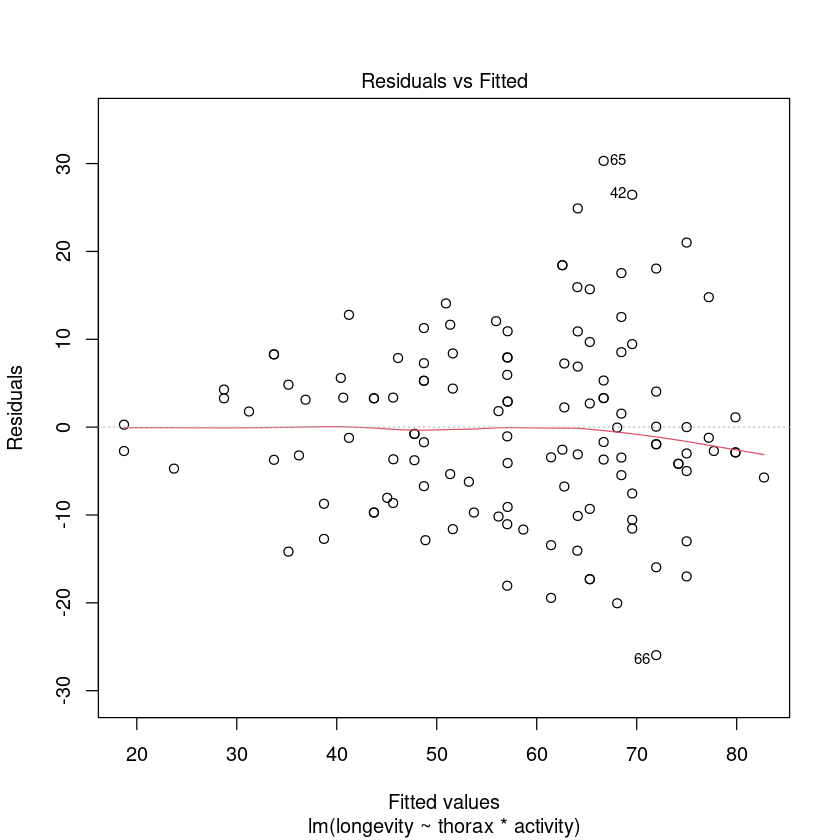

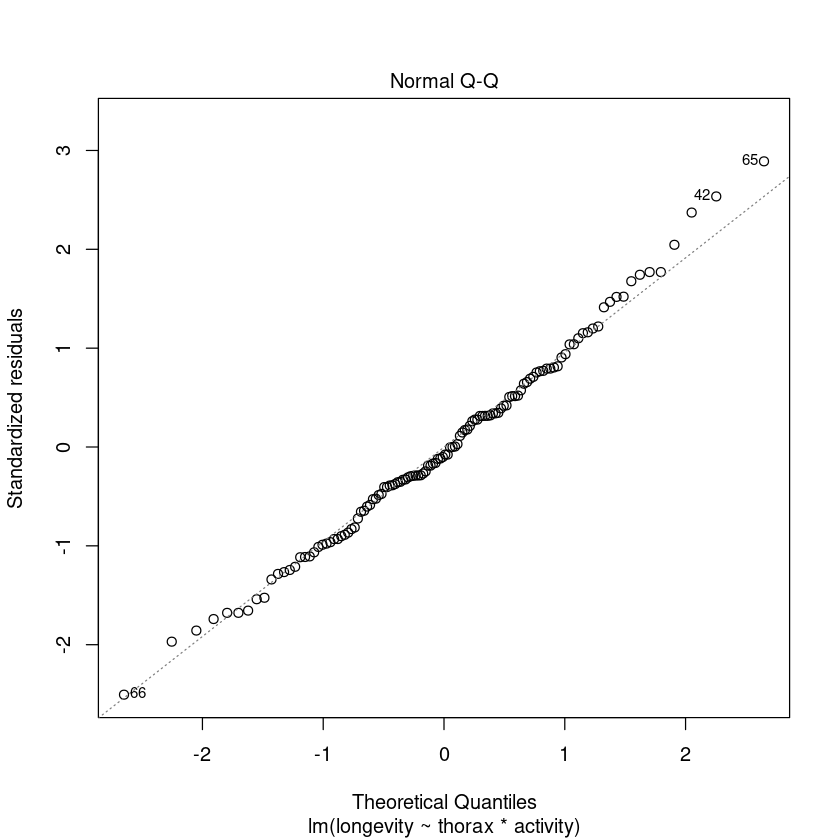

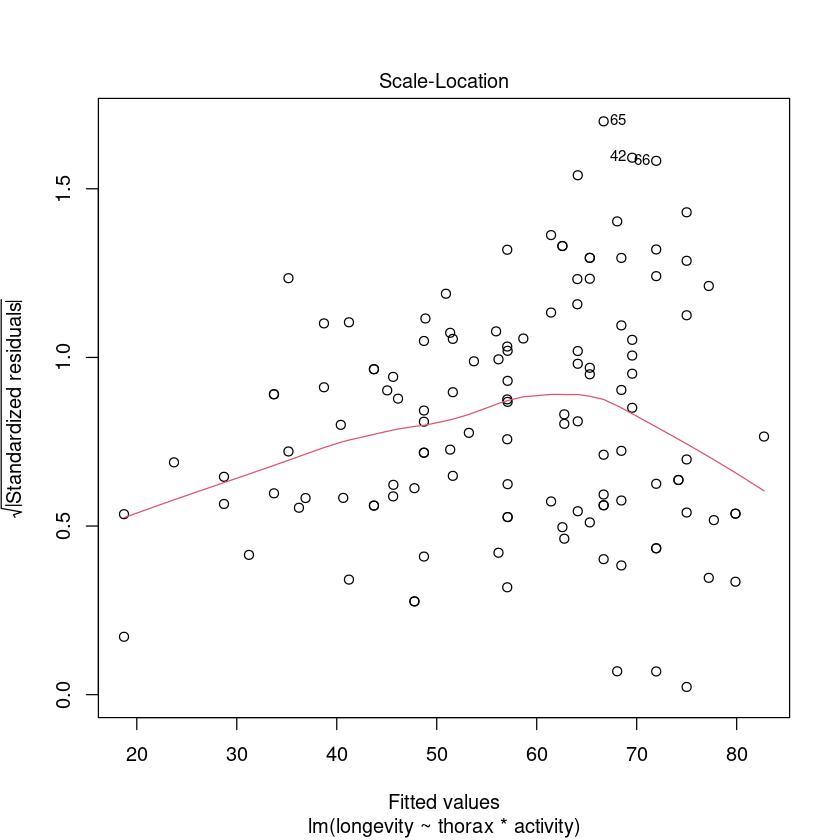

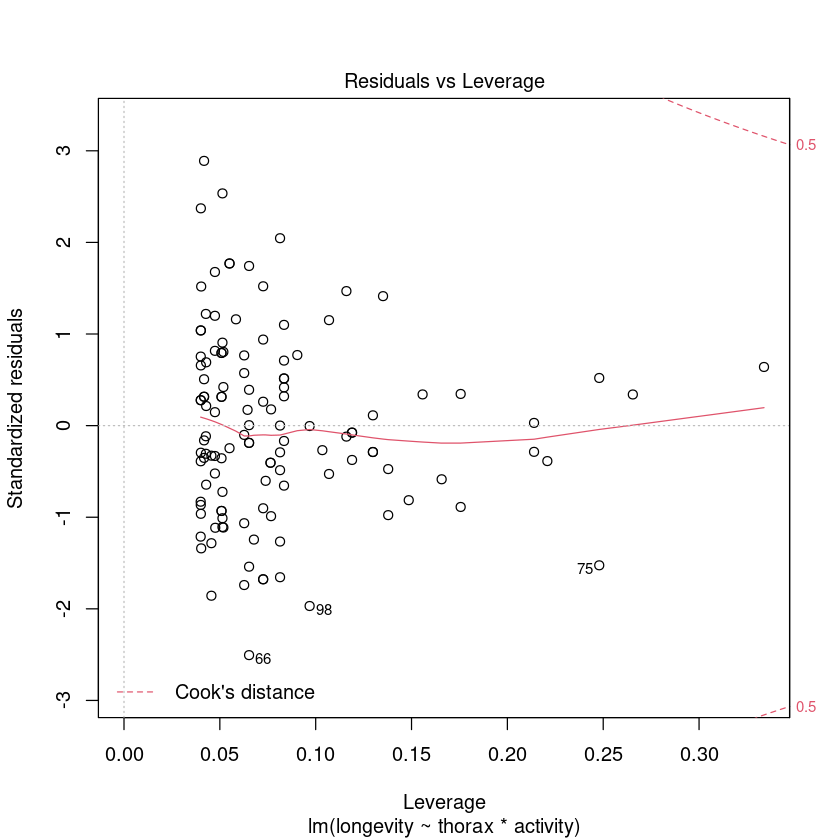

In [6]:
# Mild heteroscedasticity
plot(g)

In [7]:
anova(g)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
thorax,1,15003.30045,15003.300454,130.73288661,1.240497e-20
activity,4,9634.58753,2408.646883,20.98800599,5.503126e-13
thorax:activity,4,24.31359,6.078398,0.05296478,9.946914e-01
Residuals,114,13082.98391,114.763017,NA,NA


*The table starts with:
null model $y \sim 1$ vs effect of thorax $y \sim thorax$

In [9]:
# leaving the interaction out
gb = lm(longevity ~ thorax + activity, fruitfly)

In [11]:
# Testing effect of predictors along
# Test each term relative to the full model
drop1(gb, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,13107.30,589.9197,NA,NA
thorax,1,12368.421,25475.72,670.3247,111.34818,9.773403e-19
activity,4,9634.588,22741.89,650.2486,21.68413,1.974287e-13


In [12]:
summary(gb)


Call:
lm(formula = longevity ~ thorax + activity, data = fruitfly)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.108  -7.014  -1.101   6.234  30.265 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -48.749     10.850  -4.493 1.65e-05 ***
thorax        134.341     12.731  10.552  < 2e-16 ***
activityone     2.637      2.984   0.884   0.3786    
activitylow    -7.015      2.981  -2.353   0.0203 *  
activitymany    4.139      3.027   1.367   0.1741    
activityhigh  -20.004      3.016  -6.632 1.05e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.54 on 118 degrees of freedom
Multiple R-squared:  0.6527,	Adjusted R-squared:  0.638 
F-statistic: 44.36 on 5 and 118 DF,  p-value: < 2.2e-16


In [31]:
round(coef(gb)[3:6], 3)

activityone  activitylow activitymany activityhigh 
       2.637       -7.015        4.139      -20.004

* High activity decreases 20 days relative to the reference group (isolated)

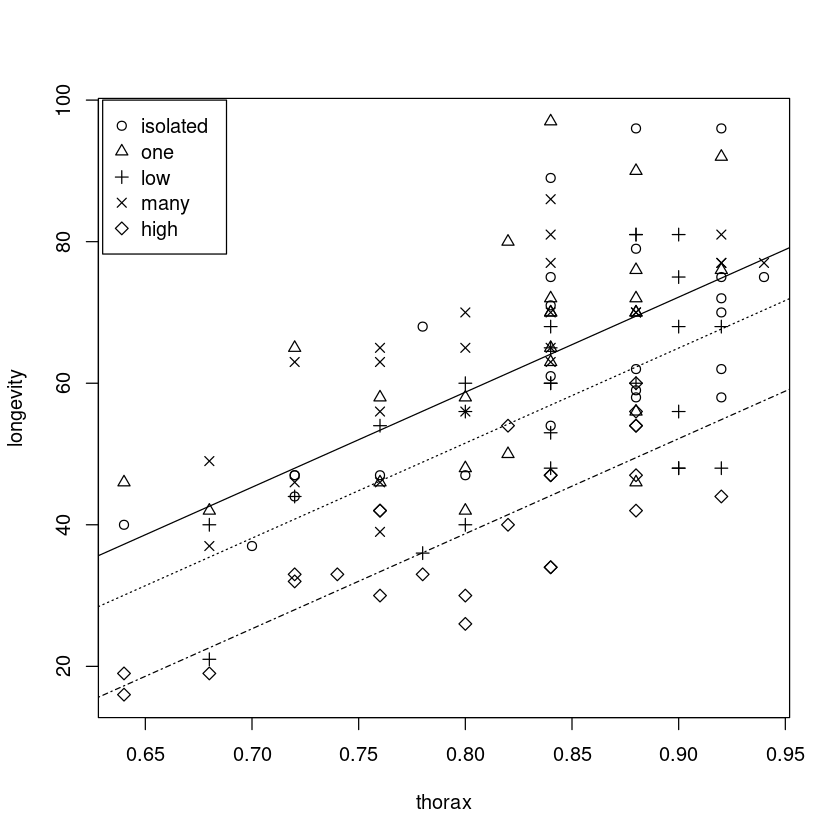

In [21]:
plot(longevity ~ thorax, fruitfly, pch=unclass(activity))
legend(0.63, 100, levels(fruitfly$activity), pch=1:5)
abline(-48.7, 134.3)
#abline((-48.7+2.63), 134.3, lty=2)
abline((-48.7-7.2), 134.3, lty=3)
#abline((-48.7+4.12), 134.3, lty=4)
abline((-48.7-20.00), 134.3, lty=4)


* The residuals show some nonconstant variance although it does not appear to be related to the five groups
* Log transformation can remove the heteroscedasticity

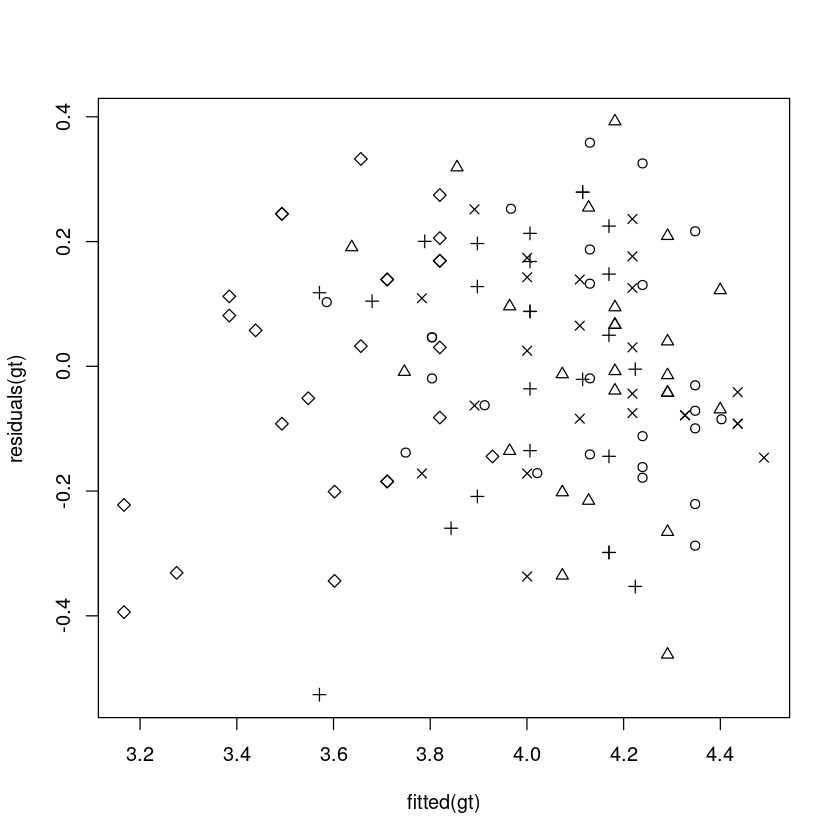

In [26]:
gt = lm(log(longevity) ~ thorax + activity, fruitfly)
plot(residuals(gt) ~ fitted(gt), pch = unclass(fruitfly$activity))

In [27]:
summary(gt)


Call:
lm(formula = log(longevity) ~ thorax + activity, data = fruitfly)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52641 -0.13629 -0.00823  0.13918  0.39273 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.84421    0.19882   9.276 1.04e-15 ***
thorax        2.72146    0.23329  11.666  < 2e-16 ***
activityone   0.05174    0.05468   0.946   0.3459    
activitylow  -0.12387    0.05463  -2.268   0.0252 *  
activitymany  0.08791    0.05546   1.585   0.1156    
activityhigh -0.41925    0.05527  -7.586 8.35e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1931 on 118 degrees of freedom
Multiple R-squared:  0.7025,	Adjusted R-squared:  0.6899 
F-statistic: 55.72 on 5 and 118 DF,  p-value: < 2.2e-16


* $R^2$ is higher for this model due to the log transformation, but the pvalue is similar

In [28]:
# comparing the R2
round(exp(coef(gt)[3:6]), 3)

activityone  activitylow activitymany activityhigh 
       1.053        0.883        1.092        0.658

* Comparing to the reference level, we see that high activity decreases 34% of longevity 